In [16]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\Shared\CSV Files\News_Twitter_Stock_Reddit_NaN_Final.csv")
df = df.drop(["Date", "Stockname", "Close_USD"], axis=1)

df

,News_Senti,Volume,Open_USD,High_USD,Low_USD,Adj_Close_USD,Twitter_Senti,Reddit_Comment,Reddit_SelfText
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167460,0.352600
1,NaN,13112253.0,41.508241,42.088464,40.615591,39.984037,NaN,0.091721,-0.167850
2,-0.013258,10959655.0,41.112864,41.741913,41.112864,40.782627,NaN,0.195632,0.065820
3,NaN,8776763.0,41.783077,42.096227,41.201514,40.692290,NaN,0.089100,0.192950
4,NaN,7039773.0,41.233912,41.636413,40.786690,40.416246,NaN,0.107269,0.191075
...,...,...,...,...,...,...,...,...,...
483,NaN,NaN,NaN,NaN,NaN,NaN,0.6369,NaN,NaN
484,0.107508,6431522.0,43.335973,44.019775,43.335973,43.848824,0.6369,NaN,NaN
485,0.139891,7581629.0,44.008072,44.264928,43.494359,43.751215,0.6729,NaN,NaN
486,NaN,8959435.0,43.406557,43.492172,42.978485,43.149714,0.9357,NaN,NaN


# Non NaN Stock Data + Sentiments Filled With 0

In [18]:
df[["News_Senti","Twitter_Senti", "Reddit_Comment", "Reddit_SelfText"]] = df[["News_Senti","Twitter_Senti", "Reddit_Comment", "Reddit_SelfText"]].fillna(0)
df = df.dropna().reset_index(drop=True)
print(df)

X = df.loc[:, df.columns != 'Adj_Close_USD'].to_numpy()
y = df["Adj_Close_USD"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print("Training Rows: ",X_train.shape[0])
print("Testing Rows: ",X_test.shape[0])

     News_Senti      Volume   Open_USD   High_USD    Low_USD  Adj_Close_USD  \
0      0.000000  13112253.0  41.508241  42.088464  40.615591      39.984037   
1     -0.013258  10959655.0  41.112864  41.741913  41.112864      40.782627   
2      0.000000   8776763.0  41.783077  42.096227  41.201514      40.692290   
3      0.000000   7039773.0  41.233912  41.636413  40.786690      40.416246   
4      0.000000  17843706.0  40.692186  41.005202  39.932002      39.487791   
..          ...         ...        ...        ...        ...            ...   
318    0.000000   7879897.0  43.240752  43.581230  42.985393      43.325872   
319    0.107508   6431522.0  43.335973  44.019775  43.335973      43.848824   
320    0.139891   7581629.0  44.008072  44.264928  43.494359      43.751215   
321    0.000000   8959435.0  43.406557  43.492172  42.978485      43.149714   
322    0.107235  10304777.0  43.661609  44.004053  43.062332      43.147943   

     Twitter_Senti  Reddit_Comment  Reddit_SelfText

# Dropping All Rows With NaN

In [4]:
# df_dropped = df.dropna().reset_index(drop=True)
# df_dropped.shape


# X = df_dropped.loc[:, df_dropped.columns != 'Adj_Close_USD'].to_numpy()
# y = df_dropped["Adj_Close_USD"].to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# print("Training Rows: ",X_train.shape[0])
# print("Testing Rows: ",X_test.shape[0])


# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Choosing the number of estimators that fits the model the best 
r2_value = []
for i in range(100, 1100, 100):
    text_classifier = RandomForestRegressor(n_estimators=i, random_state=0)
    text_classifier.fit(X_train, y_train)
    y_pred = text_classifier.predict(X_test)
    r2_value.append((metrics.r2_score(y_test, y_pred),i))
    print("R^2: {:.8f} n_estimators = {}".format(metrics.r2_score(y_test, y_pred), i))

r2 = pd.DataFrame(r2_value, columns = ["R2", "n_estimators"]).set_index("n_estimators")
n_est = r2.R2[r2.R2 == r2.R2.max()].index[0]


text_classifier = RandomForestRegressor(n_estimators = n_est, random_state=0)
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)

print()
print("N_Estimators: ", n_est)
print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.96681532 n_estimators = 100
R^2: 0.96685539 n_estimators = 200
R^2: 0.96601133 n_estimators = 300
R^2: 0.96601565 n_estimators = 400
R^2: 0.96594055 n_estimators = 500
R^2: 0.96607593 n_estimators = 600
R^2: 0.96614013 n_estimators = 700
R^2: 0.96625053 n_estimators = 800
R^2: 0.96622733 n_estimators = 900
R^2: 0.96627378 n_estimators = 1000

N_Estimators:  200
R^2:  0.9668553888106292
Variance Score:  0.9669585338788049
Max Error:  0.9745191507949826
Mean Absolute Error: 0.29357407443183
Mean Squared Error: 0.13100500185680672
Root Mean Squared Error: 0.36194613115325147


In [20]:
import eli5
from eli5.sklearn import PermutationImportance

feature = df.loc[:,df.columns != 'Adj_Close_USD'].columns.values.tolist()

feature_x = []
for i in range(8):
    feature_x.append("x" + str(i))
feature_x

weight_relation = pd.DataFrame({"Columns" : feature, 
                                "Feature" : feature_x}).set_index("Feature")
print(weight_relation)


perm = PermutationImportance(text_classifier).fit(X_test, y_test)
eli5.show_weights(perm)



                 Columns
Feature                 
x0            News_Senti
x1                Volume
x2              Open_USD
x3              High_USD
x4               Low_USD
x5         Twitter_Senti
x6        Reddit_Comment
x7       Reddit_SelfText


Weight,Feature
1.0054 ± 0.3072,x4
0.2160 ± 0.0183,x3
0.0033 ± 0.0032,x5
0.0030 ± 0.0030,x6
0.0014 ± 0.0008,x7
0.0009 ± 0.0011,x2
0.0002 ± 0.0004,x0
-0.0004 ± 0.0018,x1


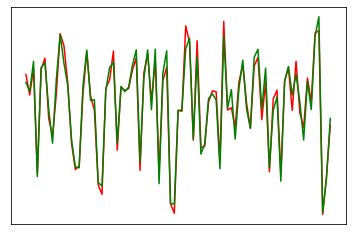

In [23]:
import matplotlib.pyplot as plt

# Plot outputs

plt.plot(y_test, color = "red")
plt.plot(y_pred, color = "green")


plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_pred - y_test)})
test

,Actual,Predicted,Difference
0,40.056229,39.717473,-0.338756
1,39.177294,39.339510,0.162216
2,40.312575,40.609266,0.296691
3,35.849020,35.696472,-0.152547
4,40.273477,40.352316,0.078839
...,...,...,...
76,41.821004,41.684948,-0.136056
77,41.928229,42.519870,0.591641
78,34.081815,34.155621,0.073806
79,35.728689,35.597296,-0.131394


# Linear Regression

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred))
# The intercept
print("Intercept: ", regr.intercept_)

Coefficients: 
 [ 3.67536502e-01  3.36203401e-09 -5.28765939e-01  6.34187399e-01
  8.67897037e-01  1.00029490e-01 -6.35309554e-01 -1.08853786e-01]
Mean squared error: 0.12
Coefficient of determination: 0.96940497
Intercept:  0.9312887703879866


# K Nearest Neighbours

In [10]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt

# rmse_val = [] #to store rmse values for different k
# for K in range(20):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(X_train, y_train)  #fit the model
#     pred=model.predict(X_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
    
# rmse_val = pd.DataFrame(rmse_val)
# print(rmse_val)
# print(rmse)

In [11]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# import numpy as np

# rmse_val = [] #to store rmse values for different k
# for K in range(7):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model.fit(X_train, y_train)  #fit the model
#     pred=model.predict(X_test) #make prediction on test set
#     error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
    
# rmse_val = pd.DataFrame(rmse_val)
# # print(rmse_val)
# print("K = ",rmse_val.idxmin()[0])

In [12]:
# from sklearn import metrics
# from sklearn import neighbors
# from math import sqrt




# knn = neighbors.KNeighborsRegressor(n_neighbors = 6)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)


# print("R^2: ", metrics.r2_score(y_test, y_pred))
# print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
# print("Max Error: ", metrics.max_error(y_test, y_pred))
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# CLASSIFIER

In [13]:
#Classifier

# df1 = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\News\SK-Learn\News_Stock_Data_30.csv")
# X = df1["News_Senti"].to_numpy().reshape(-1, 1)
# y = df1["Stock_Changes"].to_numpy()
# df1

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics

# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [15]:
# count = 0
# for i in range(len(y_test)):
#     if y_test[i] == y_pred[i]:
#         count += 1
# print(count, '/', len(y_test))
# print(y_test)
# print(y_pred)